In [107]:
import zipfile

In [108]:
zip_ref = zipfile.ZipFile('/content/brain_images.zip','r')
zip_ref.extractall()
zip_ref.close()

In [109]:
import os

for dirpath, dirnames, filenames in os.walk ('brain_tumor_dataset'):
  print(f'There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.')

There are 2 directories and 0 images in brain_tumor_dataset.
There are 0 directories and 155 images in brain_tumor_dataset/yes.
There are 0 directories and 98 images in brain_tumor_dataset/no.


In [110]:
!ls brain_tumor_dataset/no

'10 no.jpg'  '27 no.jpg'  '42 no.jpg'	 N16.jpg       No14.jpg    'no 8.jpg'
'11 no.jpg'  '28 no.jpg'  '43 no.jpg'	 N17.jpg       No15.jpg    'no 90.jpg'
'12 no.jpg'  '29 no.jpg'   44no.jpg	 N19.JPG       No16.jpg    'no 91.jpeg'
'13 no.jpg'  '2 no.jpeg'  '45 no.jpg'	 N1.JPG        No17.jpg    'no 923.jpg'
'14 no.jpg'  '30 no.jpg'  '46 no.jpg'	 N20.JPG       No18.jpg    'no 92.jpg'
'15 no.jpg'  '31 no.jpg'  '47 no.jpg'	 N21.jpg       No19.jpg    'no 94.jpg'
'17 no.jpg'  '32 no.jpg'  '48 no.jpeg'	 N22.JPG      'no 1.jpg'   'no 95.jpg'
'18 no.jpg'  '33 no.jpg'  '49 no.jpg'	 N26.JPG       No20.jpg    'no 96.jpg'
'19 no.jpg'  '34 no.jpg'  '4 no.jpg'	 N2.JPG        No21.jpg    'no 97.jpg'
'1 no.jpeg'  '35 no.jpg'  '50 no.jpg'	 N3.jpg        No22.jpg    'no 98.jpg'
'20 no.jpg'  '36 no.jpg'  '5 no.jpg'	 N5.jpg       'no 2.jpg'   'no 99.jpg'
'21 no.jpg'  '37 no.jpg'  '6 no.jpg'	 N6.jpg       'no 3.jpg'   'no 9.png'
'22 no.jpg'  '38 no.jpg'  '7 no.jpg'	'no 100.jpg'  'no 4.jpg'    no.jpg
'23 no.j

Image shape: (250, 201, 3)


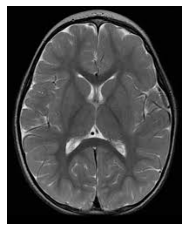

In [111]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('brain_tumor_dataset/no/N5.jpg')
#print(img)
plt.imshow(img)
plt.axis('off')
print(f"Image shape: {img.shape}")

## Criar e rescaler Dataset

In [112]:
data_dir = 'brain_tumor_dataset'

In [113]:
data_dir

'brain_tumor_dataset'

In [114]:
import numpy as np
import cv2
from PIL import Image

no_images = os.listdir(data_dir + '/no/')
yes_images = os.listdir(data_dir + '/yes/')
dataset=[]
lab=[]
for image_name in no_images:
    image=cv2.imread(data_dir + '/no/' + image_name)
    image=Image.fromarray(image)
    image=image.resize((224,224))
    dataset.append(np.array(image))
    lab.append(0)
    
for image_name in yes_images:
    image=cv2.imread(data_dir + '/yes/' + image_name)
    image=Image.fromarray(image)
    image=image.resize((224,224))
    dataset.append(np.array(image))
    lab.append(1)

In [115]:
X,y = np.array(dataset), np.array(lab) 

In [116]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [119]:
len(X_train), len(y_train), len(X_test), len(y_test)

(202, 202, 51, 51)

In [120]:
import pandas as pd
values = pd.DataFrame(y_train)
values.value_counts()

1    124
0     78
dtype: int64

In [121]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1])

In [122]:
X_train = X_train/255.
X_test = X_test/255.

## Model_1


In [123]:
tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=100,kernel_size=3, activation='relu',input_shape=(224,224,3)),
    tf.keras.layers.AveragePooling2D(3),
    tf.keras.layers.Conv2D(25,3,activation='relu'),
    tf.keras.layers.AveragePooling2D(3),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

In [124]:
model_1.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [125]:
history_1 = model_1.fit(X_train,y_train,
                        epochs=10,
                        batch_size=32,
                        validation_data=(X_test,y_test))

Epoch 1/10
7/7 [==============================] - 2s 111ms/step - loss: 0.6578 - accuracy: 0.6634 - val_loss: 0.5997 - val_accuracy: 0.6471
Epoch 2/10
7/7 [==============================] - 0s 64ms/step - loss: 0.5893 - accuracy: 0.7030 - val_loss: 0.5393 - val_accuracy: 0.7843
Epoch 3/10
7/7 [==============================] - 0s 61ms/step - loss: 0.5547 - accuracy: 0.7178 - val_loss: 0.5254 - val_accuracy: 0.7255
Epoch 4/10
7/7 [==============================] - 0s 62ms/step - loss: 0.5178 - accuracy: 0.7871 - val_loss: 0.5678 - val_accuracy: 0.7059
Epoch 5/10
7/7 [==============================] - 0s 62ms/step - loss: 0.5017 - accuracy: 0.7376 - val_loss: 0.5169 - val_accuracy: 0.7451
Epoch 6/10
7/7 [==============================] - 0s 63ms/step - loss: 0.4834 - accuracy: 0.7970 - val_loss: 0.5356 - val_accuracy: 0.7255
Epoch 7/10
7/7 [==============================] - 0s 59ms/step - loss: 0.4570 - accuracy: 0.7624 - val_loss: 0.4996 - val_accuracy: 0.7255
Epoch 8/10
7/7 [==========

<AxesSubplot:xlabel='Epochs'>

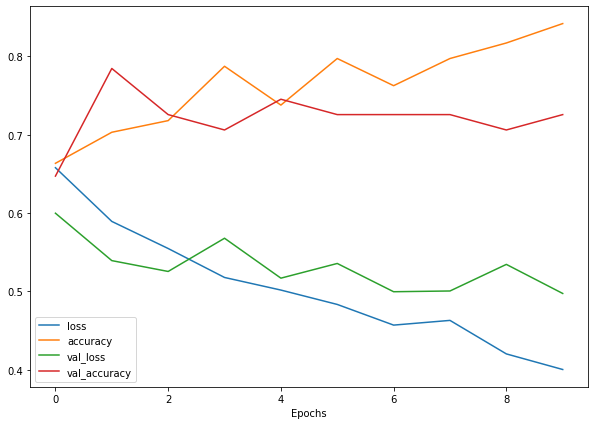

In [126]:
import pandas as pd

pd.DataFrame(history_1.history).plot(xlabel='Epochs',figsize=(10, 7)) 

In [127]:
model_1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 222, 222, 100)     2800      
                                                                 
 average_pooling2d_2 (Averag  (None, 74, 74, 100)      0         
 ePooling2D)                                                     
                                                                 
 conv2d_3 (Conv2D)           (None, 72, 72, 25)        22525     
                                                                 
 average_pooling2d_3 (Averag  (None, 24, 24, 25)       0         
 ePooling2D)                                                     
                                                                 
 flatten_1 (Flatten)         (None, 14400)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

## Predicting

In [134]:
no_tumor_pathfile = '/content/no/no 1.jpg'
yes_tumor_pathfile = '/content/yes/Y170.JPG'

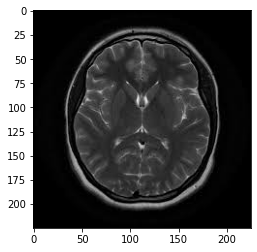

In [135]:
img = mpimg.imread(no_tumor_pathfile)
plt.imshow(img)

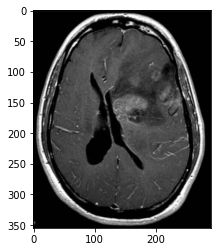

In [136]:
img = mpimg.imread(yes_tumor_pathfile)
plt.imshow(img)

In [137]:
no_tumor = tf.io.read_file(no_tumor_pathfile)
yes_tumor = tf.io.read_file(yes_tumor_pathfile)

no_tumor = tf.image.decode_image(no_tumor, channels=3)
yes_tumor = tf.image.decode_image(yes_tumor, channels=3)

no_tumor = tf.image.resize(no_tumor, size = [224,224])
yes_tumor = tf.image.resize(yes_tumor, size = [224,224])

no_tumor = no_tumor/255.
yes_tumor = yes_tumor/255.

print(no_tumor.ndim)
print(yes_tumor.ndim)

3
3


In [138]:
pred_no = model_1.predict(tf.expand_dims(no_tumor,axis=0))
pred_no

1/1 [==============================] - 0s 65ms/step


array([[0.16977313]], dtype=float32)

In [139]:
pred_y = model_1.predict(tf.expand_dims(yes_tumor,axis=0))
pred_y

1/1 [==============================] - 0s 20ms/step


array([[0.9962334]], dtype=float32)

## Evaluating

In [140]:
model_1.evaluate(X_test,y_test)

2/2 [==============================] - 0s 20ms/step - loss: 0.5498 - accuracy: 0.7647


[0.5497618913650513, 0.7647058963775635]

In [141]:
model_pred_test = model_1.predict(tf.squeeze(X_test))
model_pred_test = tf.round(model_pred_test)

2/2 [==============================] - 0s 23ms/step


In [142]:
model_pred_test = tf.squeeze(model_pred_test)

In [143]:
y_test

array([1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1])

In [144]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(model_pred_test, y_test))
print("\n\n -----------------------------")
print(classification_report(model_pred_test, y_test))

[[10  2]
 [10 29]]


 -----------------------------
              precision    recall  f1-score   support

         0.0       0.50      0.83      0.62        12
         1.0       0.94      0.74      0.83        39

    accuracy                           0.76        51
   macro avg       0.72      0.79      0.73        51
weighted avg       0.83      0.76      0.78        51

